<a href="https://colab.research.google.com/github/AdamMcCloskey381/Udemy-ML/blob/main/CVDecisionTreeClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.datasets import make_moons

In [4]:
np.random.seed(42)
sns.set(font_scale=1.5)

In [6]:
raw_data = make_moons(n_samples=700, noise=0.25, random_state=42)

In [9]:
df = pd.DataFrame(data=np.c_[raw_data[0], raw_data[1]],
                  columns=["x1", "x2", "y"])

In [12]:
px.scatter(df, x="x1", y="x2", color="y", width=700, height=400)

In [16]:
from sklearn.model_selection import train_test_split
X = df.iloc[:, :2]
y = df.iloc[:, 2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

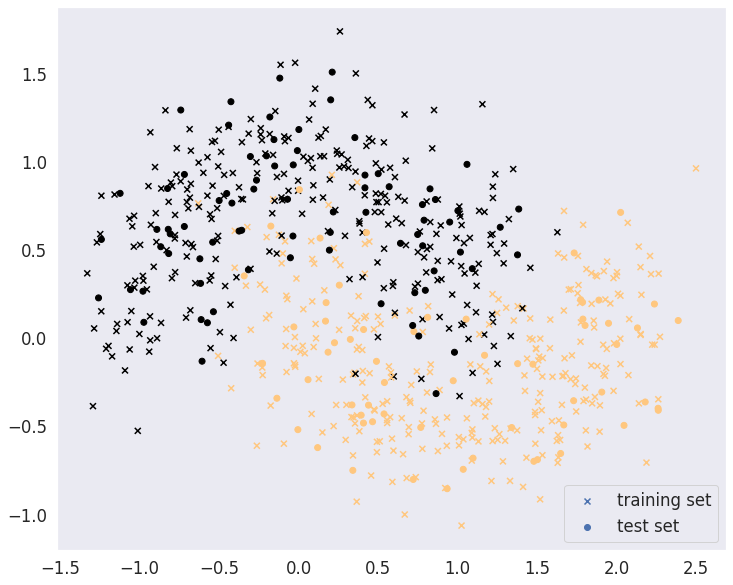

In [32]:
plt.figure(figsize=(12, 10))
plt.scatter(x=X_train.iloc[:, 0], y=X_train.iloc[:, 1], c=y_train, cmap="copper", marker="x", label="training set")
plt.scatter(x=X_test.iloc[:, 0], y=X_test.iloc[:, 1], c=y_test, cmap="copper", marker="o", label="test set")
plt.legend(loc="lower right")
plt.grid()
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



Text(0.5, 1.0, 'the accuracy of the model was: 0.8857')

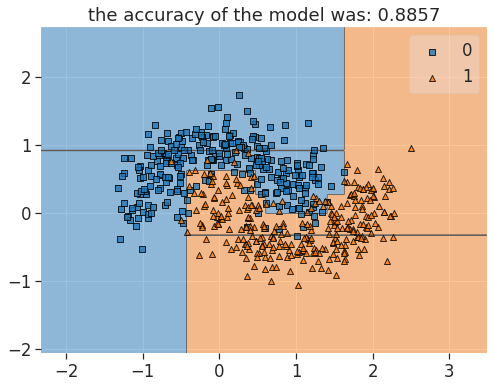

In [56]:
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score
dlr = DecisionTreeClassifier(max_depth=5, min_samples_split=5)
dlr.fit(X_train, y_train)
plt.figure(figsize=(8, 6))
plot_decision_regions(np.array(X_train), np.array(y_train.apply(lambda x: int(x))), dlr)
plt.title(f"the accuracy of the model was: {round(accuracy_score(y_test, dlr.predict(X_test)), 4)}")

In [57]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dlr, X=X_train, y=y_train, cv=15)
print(f"the accuracy of the model was: {round(scores.mean(), 4)} with the standard error being: {round(scores.std(), 4)}")

the accuracy of the model was: 0.9145 with the standard error being: 0.0425
